In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [4]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [5]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [6]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

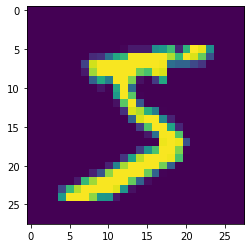

In [7]:
plt.imshow(train_digits[0])

In [8]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([19144, 51867, 34791,  4659, 52242, 32262, 43231, 44144, 56084,
       23048, 57811, 50110,  5310,  7476, 48514, 44676])

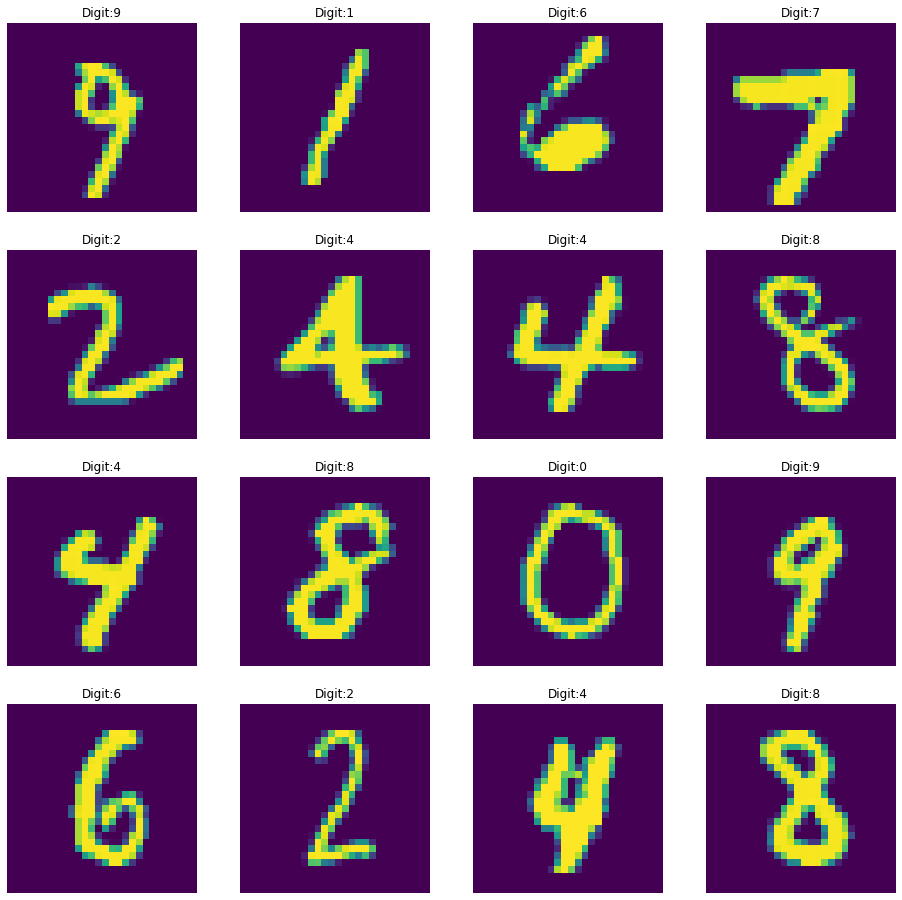

In [9]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [10]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [14]:
train_labels_cat = to_categorical(train_labels)

In [15]:
test_labels_cat=to_categorical(test_labels)

In [16]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [ ]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

**Model-1**

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [22]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 118us/step - loss: 0.2503 - accuracy: 0.9221 - val_loss: 0.1283 - val_accuracy: 0.9610
Epoch 2/5
54000/54000 [==============================] - 6s 115us/step - loss: 0.1122 - accuracy: 0.9655 - val_loss: 0.1129 - val_accuracy: 0.9683
Epoch 3/5
54000/54000 [==============================] - 6s 114us/step - loss: 0.0798 - accuracy: 0.9751 - val_loss: 0.1109 - val_accuracy: 0.9680
Epoch 4/5
54000/54000 [==============================] - 6s 109us/step - loss: 0.0646 - accuracy: 0.9799 - val_loss: 0.1194 - val_accuracy: 0.9660
Epoch 5/5
54000/54000 [==============================] - 6s 111us/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0981 - val_accuracy: 0.9733


In [23]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.08849324609435862, 0.9731000065803528]

In [24]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [25]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[9.9514192e-09, 6.6430111e-05, 5.4545744e-06, 1.9951099e-06,
        2.9574454e-07, 1.8398175e-08, 1.8033797e-11, 9.9990249e-01,
        1.3403453e-06, 2.1987700e-05]], dtype=float32)

In [26]:
model.predict(test_digits_sc[:10])

array([[9.95143790e-09, 6.64300460e-05, 5.45457942e-06, 1.99510987e-06,
        2.95744258e-07, 1.83981754e-08, 1.80338314e-11, 9.99902487e-01,
        1.34034406e-06, 2.19877020e-05],
       [1.73198422e-09, 2.88499768e-06, 9.99665976e-01, 3.30233976e-04,
        8.41122061e-10, 2.55256065e-08, 6.42826625e-10, 1.05933566e-07,
        8.67054098e-07, 3.04631580e-12],
       [7.67917008e-10, 9.99989986e-01, 5.59857995e-07, 1.98281604e-08,
        1.54546967e-06, 1.35860091e-07, 5.09792017e-07, 3.34412334e-07,
        6.89012541e-06, 9.65590186e-09],
       [9.99972701e-01, 2.62477215e-07, 1.54671470e-05, 7.10768830e-08,
        8.02778970e-07, 4.24651034e-08, 8.62990601e-06, 2.43514950e-08,
        8.70948952e-07, 1.10561541e-06],
       [3.81970899e-09, 1.11649831e-06, 2.44155956e-07, 1.03199005e-09,
        9.99827743e-01, 3.71419560e-07, 5.50007462e-06, 1.46240566e-07,
        5.19770128e-06, 1.59620919e-04],
       [6.31491387e-12, 9.99999881e-01, 5.99885075e-09, 8.62628441e-11,
   

In [27]:

model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [28]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[9.9514192e-09, 6.6430111e-05, 5.4545744e-06, 1.9951099e-06,
        2.9574454e-07, 1.8398175e-08, 1.8033797e-11, 9.9990249e-01,
        1.3403453e-06, 2.1987700e-05]], dtype=float32)

In [29]:
history.history

{'accuracy': [0.92205554, 0.9655, 0.9750926, 0.97985184, 0.9838704],
 'loss': [0.25033061764720416,
  0.11221360154015322,
  0.07977935113775095,
  0.06460246081781332,
  0.052672766234824885],
 'val_accuracy': [0.9610000252723694,
  0.9683333039283752,
  0.9679999947547913,
  0.9660000205039978,
  0.9733333587646484],
 'val_loss': [0.12828318271537623,
  0.11290599253152808,
  0.11089219119213521,
  0.11938777508462468,
  0.09806712451918671]}

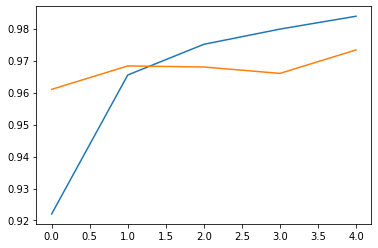

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**Model-2**

In [31]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [34]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [35]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 119us/step - loss: 0.2628 - accuracy: 0.9217 - val_loss: 0.1281 - val_accuracy: 0.9627
Epoch 2/5
54000/54000 [==============================] - 6s 114us/step - loss: 0.1110 - accuracy: 0.9666 - val_loss: 0.1324 - val_accuracy: 0.9615
Epoch 3/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.0813 - accuracy: 0.9756 - val_loss: 0.1149 - val_accuracy: 0.9683
Epoch 4/5
54000/54000 [==============================] - 6s 114us/step - loss: 0.0631 - accuracy: 0.9809 - val_loss: 0.1057 - val_accuracy: 0.9742
Epoch 5/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.0984 - val_accuracy: 0.9725


In [36]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 32us/step


[0.08989085959342774, 0.9769999980926514]

In [37]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [46]:
model1.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.3529983e-10, 7.7479436e-09, 1.9413002e-09, 3.3921224e-09,
        1.4828784e-09, 1.3327500e-12, 8.3660343e-15, 9.9998957e-01,
        1.4634521e-08, 1.6591058e-06]], dtype=float32)

In [47]:
model1.predict(test_digits_sc[:10])

array([[1.35299577e-10, 7.74798714e-09, 1.94130756e-09, 3.39212880e-09,
        1.48287560e-09, 1.33276018e-12, 8.36596993e-15, 9.99989569e-01,
        1.46344936e-08, 1.65910910e-06],
       [1.61717413e-08, 1.55508030e-06, 9.99991179e-01, 2.85981173e-07,
        1.46948480e-07, 1.41207146e-09, 1.68735081e-10, 5.60458204e-07,
        1.39871702e-07, 5.82098258e-11],
       [1.39726968e-08, 9.99595881e-01, 1.58824423e-06, 2.54837914e-07,
        9.42010104e-07, 1.49067830e-07, 7.87330407e-07, 2.31014027e-07,
        1.29077725e-05, 3.84759630e-07],
       [9.99446154e-01, 1.39664422e-07, 4.58736686e-05, 1.54654754e-05,
        1.42789861e-06, 7.71739142e-05, 1.31934881e-04, 2.71587169e-06,
        5.82160783e-06, 1.91227718e-05],
       [8.15311409e-08, 1.46890545e-06, 1.22743108e-06, 6.65840219e-08,
        9.99774456e-01, 4.44998250e-07, 7.32495522e-08, 2.45682372e-06,
        1.43870261e-06, 2.52753496e-04],
       [4.09402845e-10, 9.99963284e-01, 4.33486846e-09, 5.98657568e-09,
   

In [48]:
model1.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [49]:
model1.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.3529983e-10, 7.7479436e-09, 1.9413002e-09, 3.3921224e-09,
        1.4828784e-09, 1.3327500e-12, 8.3660343e-15, 9.9998957e-01,
        1.4634521e-08, 1.6591058e-06]], dtype=float32)

In [50]:
history.history

{'accuracy': [0.9217037, 0.9665741, 0.9756111, 0.98087037, 0.9842778],
 'loss': [0.2627817553499783,
  0.11099552750959993,
  0.08134054413417147,
  0.06311951699680476,
  0.05160920838515826],
 'val_accuracy': [0.9626666903495789,
  0.9614999890327454,
  0.9683333039283752,
  0.9741666913032532,
  0.9725000262260437],
 'val_loss': [0.12809779955943426,
  0.13235460126399995,
  0.11489422948161761,
  0.10574397356932362,
  0.09842239160719328]}

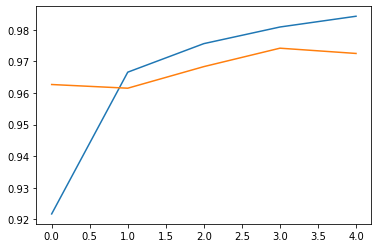

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

- The accuarcy and Val_Accuracy of the model 1 is :[0.08849324609435862, 0.9731000065803528]

- The accuarcy andVal_Accuracy of the model 2 is :[0.08989085959342774, 0.9769999980926514]
- Hence model 2 is best than model 1